# Deutsch-Josza Algorithm

Deutsch-Josza Algorithm  is the first algorithm that brought clear quantum advantage over classical computing. It was introduced by David Deutsch and Richard Jozsa in 1992.[1] In Deutsch’s problem we are given a black box which computes a one-bit boolean function. That is, a function which takes in one bit and outputs one bit. We can represent the function f as $f\{0,1\} \rightarrow \{0,1\}$ 


The function takes n-digit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that the function is either constant (0 on all outputs or 1 on all outputs) or balanced (returns 1 for half of the input domain and 0 for the other half). The task then is to determine if $f$ is constant or balanced by using the oracle.

Let us look at the classical version of the problem for two bit input.

In [15]:
# consider a case for constant function
# For constant output
constant=0
I=[0,1]
def constant_f(constant,I=[0,1]): # function to create a constant output
    O_constant =[constant for _ in I]
    return O_constant

# Output for constant function with constant: 0
O_constant=constant_f(0)

print("Input: ", I)
print("Output:", O_constant)

Input:  [0, 1]
Output: [0, 0]


In [16]:
# consider a case for balanced function

def balanced_f(reverse= False, I=[0,1]):  # function to create a balanced function
    O_balanced=I
    if reverse:
        O_balanced= []
    return O_balanced

# Output for balanced function with negation or reverse= True
O_balanced= balanced_f(reverse=True)

print("Input: ", I)
print("Output:", O_balanced)

Input:  [0, 1]
Output: [1, 0]


In [8]:
# Determine which fuction: constant or balanced is used.
def determine_function(Output):
    if Output[0]==Output[1]:
        print("Constant")
    else:
        print("Balanced")

# Check the function for our case
determine_function(O)


Constant


## Deutsch-Josza Algorithm in quantum computing

In [1]:
#importing libraries and functions
%matplotlib inline
from math import pi
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import Aer
from qiskit.providers.aer import unitary_simulator
backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')
statevector= Aer.get_backend('statevector_simulator')
%config InlineBackend.figure_format = 'svg'

In [17]:

def blackbox(n):  # Create a blackbox that outputs either balanced or constant function randomly
    output = np.random.randint(2)
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    qc = QuantumCircuit(n+1) #circuit for oracle
    if output==0:      #for constant oracle case
         # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        constant = np.random.randint(2)
        if constant == 1:
            qc.x(n)

    
    if output==1:      #for balanced oracle case
        for qubit in range(n):
            qc.cx(qubit, n)
    
    return qc.to_gate()
def dj_algorithm(n):
    qc=QuantumCircuit(n+1,n+1)
    qc.x(n)
    for qubit in range(n+1):
        qc.h(qubit)
    qc.append(blackbox(n),range(n+1))
    for qubit in range(n):
        qc.h(qubit)
    for i in range(n):
        qc.measure(i,i)
   
    return qc

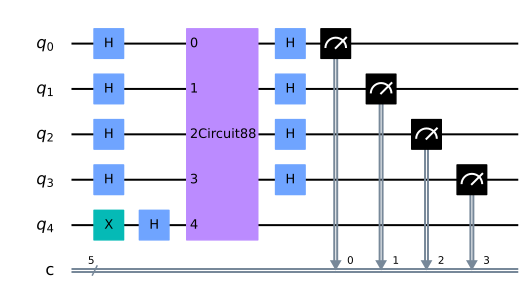

In [30]:

qc=dj_algorithm(4)
qc.draw(output='mpl')


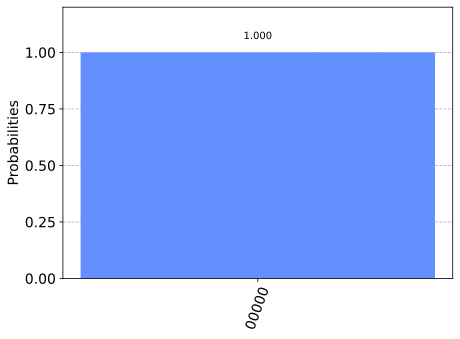

{'00000': 1000}


In [31]:
counts=execute(qc,simulator,shots=1000).result().get_counts(qc) # simulator = Aer.get_backend('qasm_simulator')
display(plot_histogram(counts))
print(counts)

In [32]:
for key in counts.keys():
    key=int(key)
    if key==0:
         print('Constant')
    else:
        print('balanced')

Constant


## References

1. https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html
2. Hidary, Jack. (2019). Quantum Computing: An Applied Approach. 10.1007/978-3-030-23922-0.
3. https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm
4. Michael A Nielsen and Isaac Chuang.Quantum  computation  and  quantum  infor-mation.  Cambridge  University  Press,  2002.isbn:  978-1-107-00217-3.url:www.cambridge.org%5C9781107002173.